# **<center> Introduction to Python for Practical Problems </center>**
# **<center> New Economic School, MAE 2025 </center>**
## **<center> Home Assignment 3 </center>**

Don't forget to use my modul - required for some tasks.

# NumPy

In [1]:
import numpy as np

### Задание 1.

(1) Создайте матрицу размерности 4x5 из стандартного нормального распределения

(2) Посчитайте определитель матрицы

(3) Оберните матрицу

In [2]:
# matrix
matr_norm_5 = np.random.normal(0, 1, (5, 5))
matr_norm_5

array([[-0.65259148,  0.24590401, -0.76509623, -0.59163303, -0.05829672],
       [ 0.80247023, -0.44148608,  0.01290884,  0.2007357 , -0.29057645],
       [ 0.70002751, -0.97118216, -0.95906958, -0.33799454, -1.85312749],
       [ 0.6819145 ,  0.19516695, -0.50493188, -0.86762724,  0.99873474],
       [-2.57542673,  1.01269282,  0.04225994,  0.23037346,  1.06472681]])

In [3]:
# determinant 
np.linalg.det(matr_norm_5)

-0.15745371122641827

In [4]:
# inverse matrix
np.linalg.inv(matr_norm_5)

array([[ 2.93543458,  2.15111541, -1.76346515, -1.14758104, -1.24502077],
       [ 8.58561483,  4.00194504, -4.88814206, -3.89774594, -3.28924935],
       [-4.53222652, -5.18746626,  1.85221193,  1.26731389,  0.37108577],
       [ 4.68865443,  5.9683122 , -2.56708665, -2.12523636, -0.58889031],
       [-1.90020924,  0.311423  ,  0.86559797,  1.34095421,  1.16886515]])

### Задание 2.

(1) Создайте 2 матрицы $A$ и $B$ размерности 4x4 из нормального распределения (метод `uniform`  в модуле `random`) со средними 1 и 2 и стандартными отклонениями 1 и 4.

(2) Вычислите результат для следующего выражения: $(A + B)*B$

(3) Выведите диагональ матрицы выше

In [5]:
# 1
m_A = np.random.normal(1, 1, (4, 4))
m_B = np.random.normal(2, 4, (4, 4))

In [6]:
# 2
(m_A + m_B) @ m_B

array([[ 23.12379471,  20.68587038,  -5.43444601,  -1.0981412 ],
       [ 15.91042257,  98.681325  ,  12.17779973, -27.48966128],
       [  4.57722667,  43.56511962,  29.42917478, -14.44753061],
       [ 70.65122463,  39.16399539,   5.82466582,  14.36916926]])

In [7]:
# 3
diagonal = np.diag((m_A + m_B) @ m_B)
print("Diagonal elements:", diagonal)

Diagonal elements: [23.12379471 98.681325   29.42917478 14.36916926]


### Задание 3.

(1) Создайте вектор со 100 элементами из равномерного распределения с $a = -5$ и $b = 5$

(2) Создайте функцию, которая на вход берет вектор и создает $k$ векторов длиной $m$. Каждый из $k$ векторов создается как подвыборка/подвектор с возвращением из исходного вектора (**hint**: Вам может потребоваться функция `choice` в модуле `random`). Для каждого $k$-го вектора ситается среднее, которое записывается в результирующий вектор. Выведите этот результирующий вектор (состоящий из средних по $k$ векторам)

In [8]:
# 1
v_100_uni = np.random.randint(-5, 5, (100,1))
v_100_uni[0:5]

array([[-5],
       [-3],
       [ 3],
       [-3],
       [ 2]])

In [9]:
# 2
def vector_stuff(vec, m, k):
    # # inefficient alternative
    # mean_vecs = [lambda ]
    # for i in range(k):
    #     mean_vecs.append(np.mean(np.random.choice(vec, size=m, replace=False)))
    
    # # efficient code
    mean_vecs = \
    [np.mean(np.random.choice(vec, size=m, replace=False)) for i in range(k)]
    return mean_vecs

In [10]:
# test
vector_stuff([0,1,2,3], 2, 5)

[1.5, 1.5, 1.0, 0.5, 0.5]

### Задание 4.

Реализуйте функцию, которая вычисляет коэффициенты регрессии при помощи МНК. Сделайте все честно, используя только операции перемножения матриц и оборачивания.

$\hat{\beta} = (X^T X)^{-1} X^T Y$

$\hat{\beta}$ is the vector of estimated coefficients.

$X$ is the matrix of predictor variables (also known as the design matrix).

$Y$ is the vector of observed target values.

In [11]:
def OLS_est(Y, X):
    """
    Y - [n*1]
    X - [n*k]
    beta - [k*1]
    """
    # OLS
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y
    return beta_hat

In [12]:
# test: n = 3, k = 2
OLS_est(np.array([1,2,3]).T, np.array([[1 , 2],
                                     [4, 9],
                                     [6, 9]]))

array([0.47305389, 0.02095808])

### Задание 5.

Реализуйте функцию, которая берет на вход двумерную матрицу, а возвращает местоположение ее минимального, максимального и медианного значения в виде словаря вида:

{'$min$': ($i_{min}$, $j_{min}$), '$max$': ($i_{max}$, $j_{max}$), '$median$': ($i_{median}$, $j_{median}$)}.

In [13]:
# get the row/column indexes from the matrix.flatten() element
def get_i_j(flattened_index, num_cols):
    row_index = flattened_index // num_cols
    col_index = flattened_index % num_cols
    return row_index, col_index

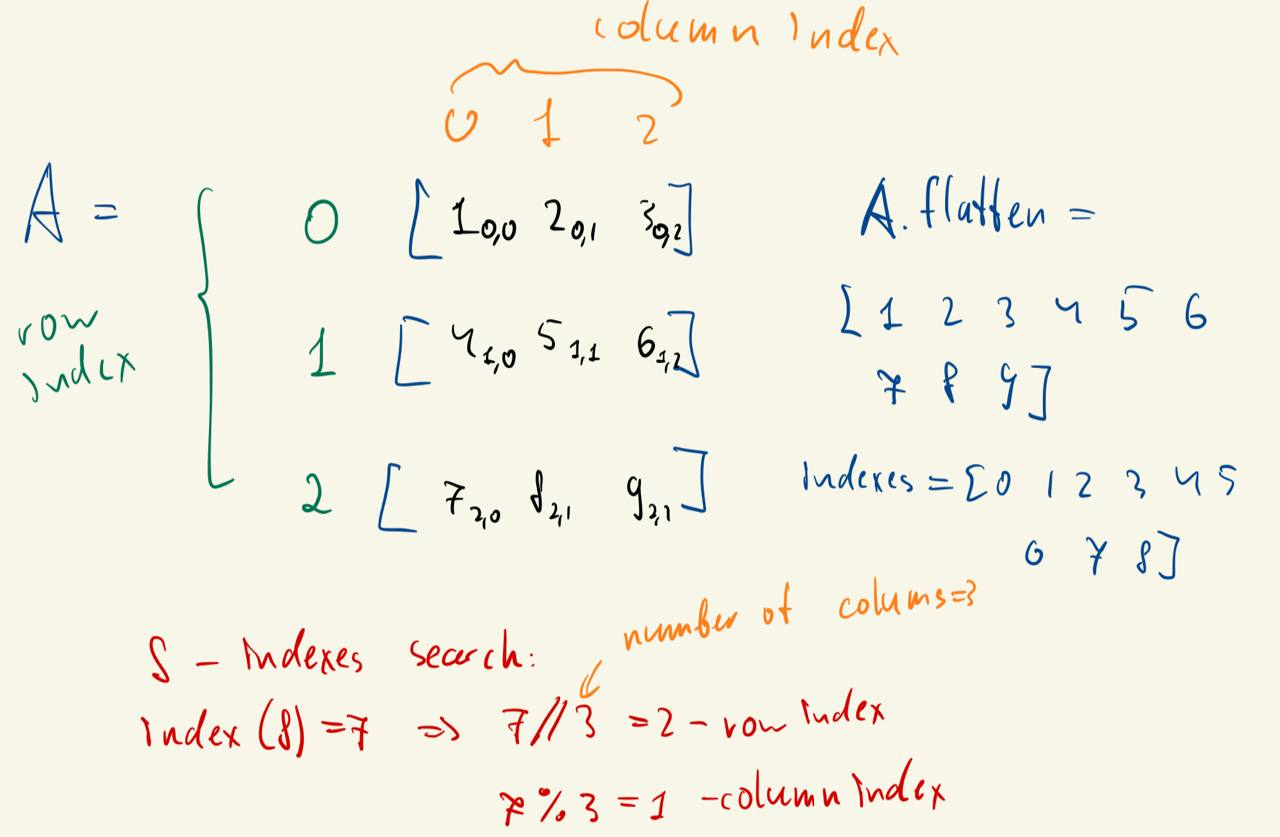

In [14]:
# illustration
from IPython.display import Image
image_path = r'C:/Users/Popov/Documents/NES_studies/Python/Elementary python/HA/HA 3 datasets/pic_flatten_index.jpg'
Image(filename=image_path)

In [15]:
# test
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

flattened_matrix = matrix.flatten()

# 6th element in the flattened matrix
index_6 = 5  # 0-based indexing
num_cols = matrix.shape[1]
row_index, col_index = get_i_j(index_6, num_cols)

print("Row index:", row_index)
print("Column index:", col_index)

Row index: 1
Column index: 2


In [16]:
# now apply for meduan, max and min
def elem_finder(X):
    dict_index = {}
    # median
    med_ind = np.where(X.flatten() == np.median(X.flatten()))
    # find indexes of all values equal to the median

    # now find all according row/column indexes
    dict_index['median'] = [get_i_j(med_ind[0][i], X.shape[1]) for i in range(len(med_ind[0]))]
    # X.shape[1] - number of columns the in matrix X
    
    # max
    max_ind = np.where(X.flatten() == np.max(X.flatten()))
    dict_index['maximum'] = [get_i_j(max_ind[0][i], X.shape[1]) for i in range(len(max_ind[0]))]
    
    # min 
    min_ind = np.where(X.flatten() == np.min(X.flatten()))
    dict_index['minimum'] = [get_i_j(min_ind[0][i], X.shape[1]) for i in range(len(min_ind[0]))]

    return dict_index

In [17]:
# test
matrix_2 = np.array([[1, 1, 3],
                   [4, 5, 6],
                   [7, 9, 9]])
elem_finder(matrix_2)

{'median': [(1, 1)], 'maximum': [(2, 1), (2, 2)], 'minimum': [(0, 0), (0, 1)]}

Note that this code finds not only the first max/min/median (if there are several similar values in the matrix), but all of them. 

---------------

# Pandas

В этом блоке заданий Вам предстоит поработь с данными по магазинным продажам, выполнив ряд аналитических задач.

Описание полей в данных:

* ID - an Id that represents a (Shop, Item) tuple within the test set
* shop_id - unique identifier of a shop
* item_id - unique identifier of a product
* category_id - unique identifier of category
* item_cnt_day - number of products sold. 
* item_price - current price of an item
* date - date in format dd/mm/yyyy
* date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,…, October 2015 is 33
* item_name - name of item
* shop_name - name of shop
* category_name - name of category

In [18]:
import pandas as pd

import warnings # to hide warnings pd likes a lot)
warnings.simplefilter("ignore")

### Задание 6.

(1) Прочтите файл **sales.csv** с помощью **Pandas**

(2) Отобразите 3 случайных наблюдения

(3) Отобразите 4 последних наблюдения

(4) Сколько наблюдений в данных?

In [19]:
# 1
df_sales = pd.read_csv(\
    "C:/Users/Popov/Documents/NES_studies/Python/Elementary python/HA/HA 3 datasets/sales.csv")
df_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [20]:
# 2 
df_sales.sample(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1451016,04.02.2014,13,56,3676,899.0,1.0
2816458,23.08.2015,31,6,4892,999.0,1.0
1921141,12.08.2014,19,19,21384,399.0,1.0


In [21]:
# 3
df_sales.tail(4)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [22]:
# 4
df_sales.shape[0]

2935849

### Задание 7.

Уберите из данных по продажам те наблюдения, у которых число покупок или цена меньше 0.

In [23]:
df_sales_new = df_sales[(df_sales["item_cnt_day"] > 0) & (df_sales["item_price"] > 0)]
df_sales_new.sample(8)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
58942,23.01.2013,0,10,15808,253.0,1.0
1728732,27.06.2014,17,7,1851,2499.0,1.0
1959389,26.09.2014,20,39,19340,499.0,1.0
2853843,11.09.2015,32,18,16167,799.0,1.0
2920888,09.10.2015,33,7,12701,149.0,1.0
1396719,09.02.2014,13,14,19866,149.0,1.0
679098,26.07.2013,6,19,16009,999.0,1.0
648562,26.07.2013,6,31,17400,149.0,1.0


In [24]:
# number of trash observations
df_sales.shape[0] -df_sales_new.shape[0] 

7357

### Задание 8.

Для полей цены и количества купленного товара отобразите описательную статистику.

In [25]:
# easy way 
df_sales_new[["item_cnt_day", "item_price"]].describe()

,item_cnt_day,item_price
count,2.928492e+06,2.928492e+06
mean,1.248337e+00,8.894668e+02
std,2.619586e+00,1.727499e+03
min,1.000000e+00,7.000000e-02
25%,1.000000e+00,2.490000e+02
50%,1.000000e+00,3.990000e+02
75%,1.000000e+00,9.990000e+02
max,2.169000e+03,3.079800e+05


In [26]:
# purist way)))
df_sales_new.loc[:, ["item_cnt_day", "item_price"]].describe()

,item_cnt_day,item_price
count,2.928492e+06,2.928492e+06
mean,1.248337e+00,8.894668e+02
std,2.619586e+00,1.727499e+03
min,1.000000e+00,7.000000e-02
25%,1.000000e+00,2.490000e+02
50%,1.000000e+00,3.990000e+02
75%,1.000000e+00,9.990000e+02
max,2.169000e+03,3.079800e+05


### Задание 9.

Выведите число уникальных магазинов и число уникальных предметов.

In [27]:
df_sales_new.loc[:,  ["shop_id", "item_id"]].nunique()

shop_id       60
item_id    21804
dtype: int64

### Задание 10.

Переведите колонку с датой в формат **datetime**.

In [28]:
df_sales_new['date'] .sample(3)

2409236    01.01.2015
1888716    30.08.2014
2731256    08.07.2015
Name: date, dtype: object

In [29]:
from datetime import datetime as dt
import datetime
from dateutil.relativedelta import relativedelta

In [30]:
# also saved in into my modul HES_helper))
import sys

path = 'C:/Users/Popov/Documents/NES_studies/Python/NES_Helper' # path of the modul
sys.path.append(path)

from NES_helper import Col_dt
from NES_helper import Ext_w

Class from the modul:

In [31]:

# # ---------------------------------- Dataframe column to datetime ----------------------------------------------------

# class Col_dt:
#     """
#     This class allows to convert a column in the dataframe into datetime format.
#     init: Col_dt(df, col, format)
#     func: col_dt()
#     -----------------------------------------------------
#     Example of usage: df_sales_new = Col_dt(df_sales_new, 'date', '%d.%m.%Y')
#     df_sales_new = df_sales_new.col_dt()
#     """
#     def __init__(self, df, col, format):
#         """
#         df - Dataframe (e.g. df_sales_new)
#         col - column in it (e.g. 'date')
#         format - datetime format (e.g. '%d.%m.%Y')
#         """
#         self.df = df
#         self.col = col
#         self.format = format

#     def col_dt(self):
#         """
#         Returns a modified dataframe.
#         """
#         # apply dt.strptime to each element of the column "date" via lambda function
#         # even axis should not be set - apply is used for the subset of a single column)
#         self.df[self.col] = self.df[self.col].apply(lambda x: dt.strptime(x, self.format))
#         return self.df


In [32]:
%%time
df_sales_new = Col_dt(df_sales_new, 'date', '%d.%m.%Y')
df_sales_new = df_sales_new.col_dt()

CPU times: total: 7.05 s
Wall time: 16.2 s


In [33]:
df_sales_new['date'].dtypes

dtype('<M8[ns]')

In [34]:
df_sales_new['date'].sample(3)

2486704   2015-03-26
1223080   2013-12-13
819643    2013-08-04
Name: date, dtype: datetime64[ns]

### Задание 11.

Создайте переменную **Year_Month**, заменив дату текущего формата на дату формата 'Y-M'. Проверьте тип данных новой колонки.

**Hint**: попробуйте присмотреться к методу `to_period` в модуле `dt`. Мы этот метод не разбирали, но он работает похожим с тем, что мы рассмотрели на занятии, образом.

In [35]:
df_sales_new['Year_Month'] = df_sales_new['date'].dt.to_period('M')
df_sales_new['Year_Month'].sample(3)

1680044    2014-05
1901463    2014-08
1654940    2014-05
Name: Year_Month, dtype: period[M]

### Задание 12.

Создайте переменную **item_gi** (item gross income) путем умножения цены купленного товара и на его количество. 

Note that item_gi is calculated separately for each shop and each date, not across shops.

In [36]:
df_sales_new['item_gi'] = df_sales_new["item_price"] * df_sales_new["item_cnt_day"]
df_sales_new['item_gi'].sample(3)

2759873    499.0
2685630     99.0
2729523    599.0
Name: item_gi, dtype: float64

### Задание 13.

(1) Посчитайте суммарные объемы продаж (item_gi) по дням (date). **Hint:** Вам понадобится группировка. So, across shops and across products, for each date.

(2) Посчитайте суммарные объемы продаж (item_gi) по дням (date) для каждого магазина (shop_id). **Hint:** Вам понадобится группировка. Thus, across products, for each date.

Для каждого из расчетов запишите их результат в переменные. Также примените метод `reset_index` к полученным результатам, указав новое имя **вместо item_gi**.

In [37]:
# 1
day_rev_t =\
df_sales_new.groupby('date')['item_gi'].sum().reset_index(name = "total_rev")
day_rev_t.sample(5)

,date,total_rev
504,2014-05-20,2360981.0
824,2015-04-05,2733807.0
224,2013-08-13,2016766.0
29,2013-01-30,1978012.0
599,2014-08-23,3379938.0


In [38]:
# 2
day_rev_shop = \
df_sales_new.groupby(['date', 'shop_id'])['item_gi'].sum().reset_index(name = "shop_rev")
day_rev_shop.sample(5)

,date,shop_id,shop_rev
45364,2015-09-17,25,334321.0
9102,2013-07-24,44,20346.0
33002,2014-12-13,31,420374.0
9288,2013-07-28,53,30502.0
28872,2014-09-21,44,40078.0


### Задание 14.

Присоедините результаты расчетов из задания 13 к общей таблице по продажам, используя тип соединения **left**

Поля, по которым соединять:
* для первого результата: date
* для второго результата: date, shop_id

Создайте переменную доли суммы продаж на дату в каждом магазине к продажам на дату по всем магазинам.

In [39]:
df_sales_new = df_sales_new.merge(day_rev_t, how='right', on='date') 
df_sales_new.sample(3)
# note that because date column is the same for both dataframes,
# the merge method (left, right...) doesn't really matter

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Year_Month,item_gi,total_rev
457415,2013-05-06,4,35,16227,379.00,1.0,2013-05,379.00,1615513.50
1397312,2014-02-12,13,27,6497,587.75,1.0,2014-02,587.75,3083329.42
32081,2013-01-07,0,27,3693,599.00,1.0,2013-01,599.00,3390827.00


In [40]:
df_sales_new = df_sales_new.merge(day_rev_shop, how='left', on=['date', 'shop_id'])
df_sales_new.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Year_Month,item_gi,total_rev,shop_rev
0,2013-01-01,0,19,18976,399.0,1.0,2013-01,399.0,1371116.5,64749.0
1,2013-01-01,0,19,18284,199.0,1.0,2013-01,199.0,1371116.5,64749.0
2,2013-01-01,0,19,18320,199.0,1.0,2013-01,199.0,1371116.5,64749.0


In [41]:
df_sales_new['share_rev'] = df_sales_new['shop_rev'] / df_sales_new ['total_rev']
df_sales_new['share_rev'].sample(3)

2856509    0.005682
2880464    0.008588
1221031    0.035002
Name: share_rev, dtype: float64

### Задание 15.

К таблице с продажами присоедините таблицы **items.csv** и **item_categories.csv**. Поля, по которым нужно проводить соединение, попробуйте определить самостоятельно.

In [42]:
df_items = pd.read_csv(\
    "C:/Users/Popov/Documents/NES_studies/Python/Elementary python/HA/HA 3 datasets/items.csv")
df_items.head()

,item_name,item_id,category_id
0,!! IN THE POWER OF HAPPINESS (PLAST) D,0,40
1,! ABBYY FineReader 12 Professional Edition Ful...,1,76
2,*** IN THE GLORY OF THE GLORY (UNV) D,2,40
3,*** BLUE WAVE (Univ) D,3,40
4,*** BOX (GLASS) D,4,40


In [43]:
df_items_cat = pd.read_csv(\
    "C:/Users/Popov/Documents/NES_studies/Python/Elementary python/HA/HA 3 datasets/item_categories.csv")
df_items_cat.head()

,category_name,category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4


In [44]:
df_sales_new = \
pd.merge(pd.merge(df_items, df_items_cat, on='category_id', how = "inner"), 
         df_sales_new, on='item_id', how = "left", suffixes = ('', ''))

# suffixes = ('', '') - to keep only one of the overlapping columns (their are the
# same usually)
df_sales_new.sample(3)

,item_name,item_id,category_id,category_name,date,date_block_num,shop_id,item_price,item_cnt_day,Year_Month,item_gi,total_rev,shop_rev,share_rev
535435,Turtles-Ninja Season 1 Collection of cartoons ...,21670,40,Cinema - DVD,2014-12-05,23.0,58.0,399.0,3.0,2014-12,1197.0,4582787.11,98075.0,0.021401
1405492,"XCOM: Enemy Unknown [PC, Jewel, Russian version]",7912,30,PC Games - Standard Editions,2013-08-24,7.0,27.0,299.5,1.0,2013-08,299.5,3285467.00,221240.0,0.067339
1088214,Sponge Bob Square Pants. Plankton: Revenge of ...,10706,19,Games - PS3,2014-04-10,15.0,47.0,1699.0,1.0,2014-04,1699.0,2200773.90,62727.0,0.028502


In [45]:
df_sales_new.columns

Index(['item_name', 'item_id', 'category_id', 'category_name', 'date',
       'date_block_num', 'shop_id', 'item_price', 'item_cnt_day', 'Year_Month',
       'item_gi', 'total_rev', 'shop_rev', 'share_rev'],
      dtype='object')

### Задание 16.

В получившейся таблице создайте колонку **cat_name_trim**, состояющую из первого слова из колонки **category_name**. Затем посчитайте число уникальных значений в новой колонке.

**Hint**: Вам нужно будет воспользоваться методом `apply`.

In [46]:
# using my module
import sys

path = 'C:/Users/Popov/Documents/NES_studies/Python/NES_Helper' # path of the modul
sys.path.append(path)

from NES_helper import Ext_w
from NES_helper import T_m

Class from the modul

In [47]:
# # ---------------------------------- Extraction of regular expressions ----------------------------------------------------

# class Ext_w:
#     """
#     This class is for the extraction of regular expressions.
#     init: Ext_w(text, func, pattern)
#     func: ext_w()   
#     -----------------------------------------------------
#     Example of usage:
#     extractor = Ext_w("text to search", "search", r"pattern")
#     result = extractor.ext_w()
#     -----------------------------------------------------
#     Can be applied for the dataframe (using additional function):
#     Example of usage:
#     #======== function ========
#     # this function allows for iterating several texts
#     def ext_help(text, func, pattern):
#         extractor = Ext_w(text, func, pattern)
#         return extractor.ext_w()
#     #========----------========
#     # Apply the extract_regex function to each row of the 'category_name' column
    
#     df_sales_new['cat_name_trim_3'] = df_sales_new['category_name'].apply(
#     lambda x: ext_help(x, 'search', r'^\s*(\S+)'))
    
#     """
#     def __init__(self, text, func, pattern):
#         """
#         text - str to extract from (e.g. 'apple is good')
#         func:   'search' - searches for a pattern within a string
#                 'match' - checks for a match only at the beginning of the string
#         pattern - regular expression for search for (e.g. r'^\s*(\S+)')
                
#         """ 
#         self.text = text
#         self.func = func
#         self.pattern = pattern

#     def ext_w(self):
#         """
#         Function extracting regular expressions from the text.
#         """
#         exp = getattr(re, self.func)(self.pattern, self.text)
#         if exp:
#             return exp.group(0)
#         else:
#             return None  

In [48]:
#======== function ========
# this function allows for iterating several texts
def ext_help(text, func, pattern):
    extractor = Ext_w(text, func, pattern)
    return extractor.ext_w()
#========          ========

# usage
# Apply the extract_regex function to each row of the 'category_name' column
df_sales_new['cat_name_trim'] = df_sales_new['category_name'].apply(
lambda x: ext_help(x, 'match', r'^\s*(\S+)'))
df_sales_new['cat_name_trim'].sample(5)

2259291         PC
475309      Cinema
816226       Music
327666      Cinema
2874167       Game
Name: cat_name_trim, dtype: object

In [49]:
df_sales_new['category_name'].sample(5)

2278453                          Games - PS4
2274390       PC Games - Additional Editions
2111056                  Gifts - Development
2590327                    Gifts - Soft toys
2457247     Gifts - Gadgets, robots , sports
Name: category_name, dtype: object

### * Задание 17.

Объединим все, что мы успели в этой домашке сделать. 

Проиджоинив таблицу **shops.csv** к получившейся в задании 16 таблице, посчитайте долю объема продаж магазинов, имевших в названии слово **Moscow**.

In [50]:
df_shops = pd.read_csv(\
    "C:/Users/Popov/Documents/NES_studies/Python/Elementary python/HA/HA 3 datasets/shops.csv")
df_shops.head()

,shop_name,shop_id
0,"! Yakutsk Ordzhonikidze, 56 francs",0
1,"! Yakutsk TC ""Central"" fran",1
2,"Adygea TC ""Mega""",2
3,"Balashikha TC ""Oktyabr-Kinomir""",3
4,"Volga TC ""Volga Mall""",4


In [51]:
df_final = pd.merge(df_sales_new, df_shops, on='shop_id', how = "left")
df_final = df_final.dropna()
df_final.sample(3)

,item_name,item_id,category_id,category_name,date,date_block_num,shop_id,item_price,item_cnt_day,Year_Month,item_gi,total_rev,shop_rev,share_rev,cat_name_trim,shop_name
421286,THE SEVEN PSYCHOPATHIANS,18633,40,Cinema - DVD,2013-04-16,3.0,57.0,399.0,1.0,2013-04,399.0,1713463.00,65989.0,0.038512,Cinema,"Yakutsk Ordzhonikidze, 56"
1287759,"Mass Effect 3 [PC, Russian subtitles]",4779,30,PC Games - Standard Editions,2014-02-05,13.0,25.0,149.5,1.0,2014-02,149.5,5340504.00,550612.0,0.103101,PC,"Moscow TEC"" Atrium """
376526,ADVENTURES OF THE CAPTAIN OF VRUNGEL. m / f,17372,40,Cinema - DVD,2013-10-04,9.0,26.0,149.0,1.0,2013-10,149.0,4798744.32,97911.0,0.020403,Cinema,"Moscow TTS"" Areal ""(Belyaevo)"


In [52]:
df_final['Msk_dummy'] = df_final['shop_name'].str.contains('Moscow', case=False).astype(int)
df_final['Msk_dummy'].sample(10)

2783639    0
455300     1
1229208    0
869213     0
1345031    0
455044     1
1338664    1
1770110    1
2257923    0
1490817    1
Name: Msk_dummy, dtype: int32

In [53]:
Moscow_shape = df_final[df_final['Msk_dummy'] == 1]['shop_rev'].sum()/\
df_final['shop_rev'].sum()

In [54]:
print(f'Moscow shops total share in revenue for the whole period of onservation:\n\
{round(Moscow_shape, 3)}')

Moscow shops total share in revenue for the whole period of onservation:
0.492
